In [1]:
import pandas as pd
import numpy as np
import geopy.distance
import matplotlib.pyplot as plt
import reverse_geocoder as rgc
import seaborn as sns
import datetime

## Berk Öztaş
#### 25260

### Basic information regarding the dataset:

* The dataset consists of 11 columns and 118185 rows

* These are the taxi trips in New York City in two weeks

#### The columns are, briefly:
    * id : unique identifier for trips
    * vendor_id : unique identifier for the recorder of the trip
    * pickup_datetime : date and time of beginning of the trip
    * dropoff_datetime : date and time of ending of the trip
    * passenger_count : how many passengers in the vehicle
    * pickup_longitude : longitude of the pickup location
    * pickup_latitude : latitude of the pickup location
    * dropoff_longitude : longitude of the dropoff location
    * dropoff_latitude : latitude of the dropoff location
    * dropoff_store_and_fwd_flag : indicates whether the record was held in vehicle memory
    * trip_duration : duration of the trip

#### Get the file

In [2]:
df = pd.read_csv("taxi-trips.csv")

#### Get the coordinates from dataset
These will be used more than once

In [3]:
pickup_coords = [(df["pickup_latitude"][i], df["pickup_longitude"][i]) for i in range(len(df))]
dropoff_coords = [(df["dropoff_latitude"][i], df["dropoff_longitude"][i]) for i in range(len(df))]

#### Get the pickup and dropoff streets using reverse geocoding

In [4]:
pickup_district = rgc.search(pickup_coords)

pickup_district = [pickup_district[i]["name"] for i in range(len(pickup_district))]

pickup_district = pd.DataFrame(pickup_district, columns=["pickup_district"])

Loading formatted geocoded file...


In [5]:
dropoff_district = rgc.search(dropoff_coords)

dropoff_district = [dropoff_district[i]["name"] for i in range(len(dropoff_district))]

dropoff_district = pd.DataFrame(dropoff_district, columns=["dropoff_district"])

#### Add the streets to the dataset

In [6]:
df = df.assign(pickup_district=pickup_district.values, dropoff_district=dropoff_district.values)

### Thee top 5 districts where passengers prefer to leave:

In [7]:
df["pickup_district"].value_counts()[:5]

Manhattan           45329
New York City       34625
Long Island City    17787
Weehawken           11334
The Bronx            2777
Name: pickup_district, dtype: int64

### Thee top 5 districts where passengers prefer to arrive:

In [8]:
df["dropoff_district"].value_counts()[:5]

Manhattan           44478
New York City       31082
Long Island City    19919
Weehawken           10621
Brooklyn             2059
Name: dropoff_district, dtype: int64

#### Find the distances of travel from coordinates
In units of metres

In [9]:
test = [geopy.distance.distance(pickup_coords[i], dropoff_coords[i]).km*1000 for i in range(len(pickup_coords))]

In [10]:
test = pd.DataFrame(test, columns=["Distance (m)"])

#### Add the distances to the dataset

In [11]:
df = df.assign(distance_m=test.values)

#### From pickup date seperate the times of day in a new column

In [12]:
time_of_day = []

for i in range(len(df)):
    hour = int(df["pickup_datetime"][i][11:13])
    data = ""
    if hour >= 7 and hour < 9:
        data = "rush_hour_morning"
    elif hour >= 9 and hour < 16:
        data = "afternoon"
    elif hour >= 16 and hour < 18:
        data = "rush_hour_evening"
    elif hour >= 18 and hour < 23:
        data = "evening"
    elif hour >= 23 or hour < 7:
        data = "late_night"
    else: #Failsafe
        data = None
    
    time_of_day.append(data)

In [13]:
time_of_day = pd.DataFrame(time_of_day, columns=["time_of_day"])

#### Add the time of day to the dataset

In [14]:
df = df.assign(time_of_day=time_of_day.values)

In [15]:
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropoff_district,distance_m,time_of_day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan,1502.171837,rush_hour_evening
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Manhattan,5114.806749,evening
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Manhattan,1495.018409,rush_hour_morning
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Long Island City,1976.278537,afternoon
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City,2513.960882,afternoon
5,id0970832,1,2016-03-12 20:39:39,2016-03-12 21:05:40,1,-74.008247,40.747353,-73.979446,40.718750,N,1561,Hoboken,New York City,4000.986842,evening
6,id2049424,2,2016-03-02 20:15:07,2016-03-02 20:37:43,1,-73.963890,40.773651,-74.005112,40.751492,N,1356,Manhattan,Weehawken,4262.648203,evening
7,id0038484,2,2016-03-09 13:41:11,2016-03-09 13:53:27,2,-73.972855,40.764400,-73.971809,40.757889,N,736,Manhattan,Manhattan,728.484387,afternoon
8,id3092788,2,2016-03-03 22:01:32,2016-03-03 22:17:44,2,-73.984772,40.710571,-73.989410,40.730148,N,972,New York City,New York City,2209.044033,evening
9,id3863815,2,2016-03-14 04:24:36,2016-03-14 04:37:11,3,-73.944359,40.714489,-73.910530,40.709492,N,755,Long Island City,East New York,2911.907582,late_night


#### To show how the average distance varies with time of day:

In [16]:
dict_for_graph = {}

# Find the total values first
for i in range(len(df)):
    tod = str(df["time_of_day"][i])
    if tod in dict_for_graph:
        dict_for_graph[tod] += int(df["distance_m"][i])
    else:
        dict_for_graph[tod] = int(df["distance_m"][i])

dict_for_graph

{'afternoon': 123608367,
 'evening': 118872598,
 'late_night': 88633692,
 'rush_hour_evening': 38650518,
 'rush_hour_morning': 31737601}

In [17]:
#Now get the averages
for key in dict_for_graph.keys():
    dict_for_graph[key] = int(dict_for_graph[key]/df["time_of_day"].value_counts()[key])

dict_for_graph

{'afternoon': 3109,
 'evening': 3377,
 'late_night': 4117,
 'rush_hour_evening': 3342,
 'rush_hour_morning': 3127}

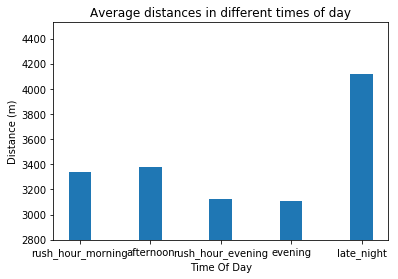

In [18]:
x = ["rush_hour_morning", "afternoon", "rush_hour_evening", "evening", "late_night"]
y = [dict_for_graph[key] for key in dict_for_graph.keys()]

minval = min(y)
maxval = max(y)

x_pos = np.linspace(0, 10, len(x))

plt.bar(x_pos, y)

plt.xlabel("Time Of Day")
plt.ylabel("Distance (m)")
plt.title("Average distances in different times of day")

plt.xticks(x_pos, x)

plt.ylim(minval-minval*0.1, maxval+maxval*0.1)

plt.show()

As we can clearly see from the graph, distances increase as it gets late. 
The shortest distances are around evening but the longest distances are at late night.

#### To show duration by time of day:

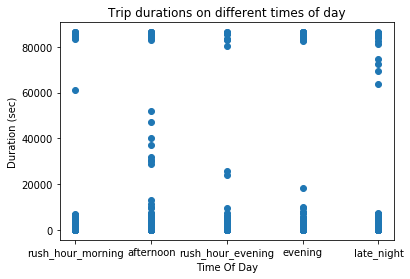

In [19]:
x = ["rush_hour_morning", "afternoon", "rush_hour_evening", "evening", "late_night"]

tod = df["time_of_day"]
dur = df["trip_duration"]

todNor = [x.index(y) for y in tod]

def placeInX(row):
    return x.index(tod[row])

plt.scatter(todNor, dur)

plt.xticks([0,1,2,3,4], x)
plt.xlabel("Time Of Day")
plt.ylabel("Duration (sec)")
plt.title("Trip durations on different times of day")

plt.show()

The durations of the trips does not show immediate and definite corrolation with the time of day. It looks like the late night drives, while longer in distance, is not different from the others in duration that much, which is interesting.

## Hypothesis Testing:

In [26]:
group_size = df["passenger_count"]
distance = df["distance_m"]

data = {1: [], 2: [], 3: [], 4: [], 5: [], 6: []}
for i in range(len(df)):
    if group_size[i] in data:
        data[group_size[i]].append(distance[i])
    else:
        data[group_size[i]] = [distance[i]]

del data[0]
print("Amount of points:")
for key in data:
    print(key, len(data[key]))

print("\nAverages:")
for key in data:
    if key == 0:
        del data[key]
    else:
        data[key] = int(sum(data[key])/len(data[key]))
    print(key, data[key])

Amount of points:
1 84290
2 16800
3 4634
4 2188
5 6296
6 3971

Averages:
1 3362
2 3558
3 3416
4 3425
5 3422
6 3393


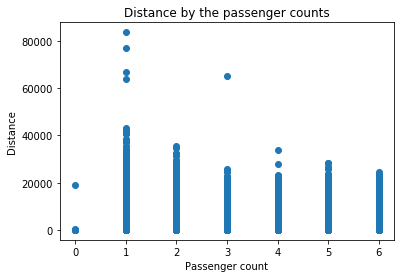

In [21]:
plt.title("Distance by the passenger counts")
plt.xlabel("Passenger count")
plt.ylabel("Distance")
plt.scatter(group_size, distance)

plt.show()

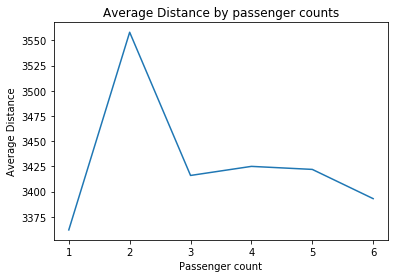

In [22]:
plt.title("Average Distance by passenger counts")
plt.xlabel("Passenger count")
plt.ylabel("Average Distance")
plt.plot(data.keys(), data.values())

plt.show()

Although the most rides are with 1 passenger (84290), the data shows that the average of 1 passenger rides is by far the lowest. The second most data is from 2 passenger rides (16800) and the average of that is by far the highest one. But we should keep in mind that the distances between these averages are not high enough to mean anything when compared with the overall distances.

[]

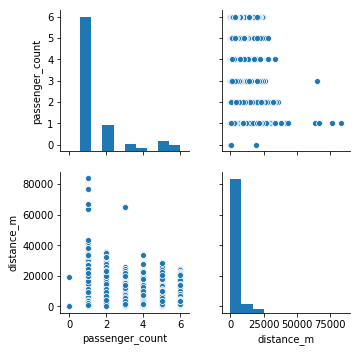

In [23]:
val = ["passenger_count", "distance_m"]

sns.pairplot(data=df, vars=val)
plt.plot()

From all these graphs it is clear that the passenger group size and distance are not corrolated. The difference in average distances are not big enough to provide reliable and confident deductions. The biggest difference in averages is around 175 metres while we are talking about 3.5 kilometres of distances. The orders of magnitudes don't match to mean anything at all.
By looking at these graphs, we can understand that:

##### Passenger group size has no observable affect on distances traveled

#### We can accept the NULL hypothesis

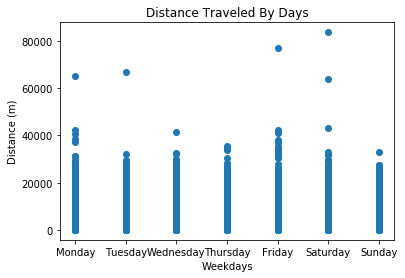

Amount of points:
Monday :  15486
Tuesday :  15718
Wednesday :  16705
Thursday :  17445
Friday :  18117
Saturday :  18838
Sunday :  15876


In [24]:
points = np.arange(7)
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
distance = df["distance_m"]

dataDays = []
daysSum = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0}
for i in range(len(df)):
    stuff = df["pickup_datetime"][i]
    dataDays.append(datetime.datetime(int(stuff[:4]), int(stuff[5:7]), int(stuff[8:10])).weekday())

for i in range(len(df)):
    daysSum[dataDays[i]] += distance[i]
    
countDays = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0}

for k in dataDays:
    countDays[k] += 1

plt.scatter(dataDays, distance)
plt.title("Distance Traveled By Days")
plt.xlabel("Weekdays")
plt.ylabel("Distance (m)")
plt.xticks(points, days)
plt.show()

print("Amount of points:")
for k in countDays:
    print(days[k], ": ", countDays[k])

The density of the data is more homogeneous then the passenger size data and it is near impossible to figure a trend at all.
Every weekday has nearly the same amount of data points and values of the points seems to be around equal as well.

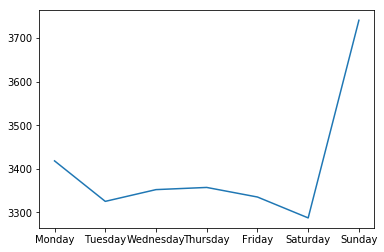

In [25]:
average = {}

for i in points:
    average[i] = int(daysSum[i]/countDays[i])

plt.plot(points, average.values())
plt.title("Average Distance Traveled By Days")
plt.xlabel("Weekdays")
plt.ylabel("Average Distance (m)")
plt.xticks(points, days)
plt.show()

When looked at the average distances however, we see that the sunday rides are longer than any other by a big margin. But again, the difference between these points are really small. But we can confidently say that the margin of sunday is easily big enough to mean something. From this data we can deduct that the Sundays are when the longest rides happen. And by that observation we can clearly throw away the null hypothesis. The longest rides happen at the sundays by a big margin and the shortest rides happen at saturday followed by thursday. The weekend is definitely playing a role here.

##### The shortest rides happen at saturday

##### The longest rides happen at sunday by a big margin

#### We can reject the NULL hypothesis